In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score, median_absolute_error, r2_score, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from scipy.stats import *
import h3
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from datetime import datetime
from math import floor
import matplotlib.pyplot as plt
import mlflow
import mlflow.sklearn

In [2]:
khatkesh_columns = ['ride_id', 'driver_id', 'a_t_a_result.arrival_a_t_a', 'a_t_a_result.boarding_a_t_a', 'a_t_a_result.ride_a_t_a', 'a_t_a_result.arrival_probe_result.probe.point.lat', 'a_t_a_result.arrival_probe_result.probe.point.lon', 'a_t_a_result.arrival_probe_result.probe.timestamp', 'a_t_a_result.arrival_probe_result.confidence', 'a_t_a_result.arrival_probe_result.h3_index', 'a_t_a_result.arrival_probe_result.k_ring_level', 'a_t_a_result.boarding_probe_result.probe.point.lat', 'a_t_a_result.boarding_probe_result.probe.point.lon', 'a_t_a_result.boarding_probe_result.probe.timestamp', 'a_t_a_result.boarding_probe_result.confidence', 'a_t_a_result.boarding_probe_result.h3_index', 'a_t_a_result.boarding_probe_result.k_ring_level', 'a_t_a_result.final_destination_probe_result.probe.point.lat', 'a_t_a_result.final_destination_probe_result.probe.point.lon', 'a_t_a_result.final_destination_probe_result.probe.timestamp', 'a_t_a_result.final_destination_probe_result.confidence', 'a_t_a_result.final_destination_probe_result.h3_index', 'a_t_a_result.final_destination_probe_result.k_ring_level',' a_t_a_result.destination_probe_result.probe.point.lat', 'a_t_a_result.destination_probe_result.probe.point.lon', 'a_t_a_result.destination_probe_result.probe.timestamp', 'a_t_a_result.destination_probe_result.confidence', 'a_t_a_result.destination_probe_result.h3_index', 'a_t_a_result.destination_probe_result.k_ring_level', 'a_t_a_result.extra_destination_probe_result.probe.point.lat', 'a_t_a_result.extra_destination_probe_result.probe.point.lon', 'a_t_a_result.extra_destination_probe_result.probe.timestamp', 'a_t_a_result.extra_destination_probe_result.confidence', 'a_t_a_result.extra_destination_probe_result.h3_index', 'a_t_a_result.extra_destination_probe_result.k_ring_level', 'pickup_a_d_d_result.distance', 'pickup_a_d_d_result.confidence', 'pickup_a_d_d_result.route_ratio', 'pickup_a_d_d_result.g_p_s_ratio', 'ride_a_d_d_result.distance', 'ride_a_d_d_result.confidence', 'ride_a_d_d_result.route_ratio', 'ride_a_d_d_result.g_p_s_ratio', 'total_a_d_d_confidence', 'in_ride_allotment', 'e_d_d', 'allotment_time', 'accept_time', 'clickhouse_time', 'hash']

In [3]:
train_dates = ['2022-12-10','2022-12-11','2022-12-12','2022-12-13','2022-12-14','2022-12-17','2022-12-18','2022-12-19','2022-12-20','2022-12-21','2022-12-24','2022-12-25','2022-12-26', '2022-12-31', '2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04']

In [8]:
khatkesh_df = pd.concat((pd.read_csv('../khatkesh_' + d + '_.csv', names=khatkesh_columns) for d in train_dates))

In [9]:
khatkesh_df

,ride_id,driver_id,a_t_a_result.arrival_a_t_a,a_t_a_result.boarding_a_t_a,a_t_a_result.ride_a_t_a,a_t_a_result.arrival_probe_result.probe.point.lat,a_t_a_result.arrival_probe_result.probe.point.lon,a_t_a_result.arrival_probe_result.probe.timestamp,a_t_a_result.arrival_probe_result.confidence,a_t_a_result.arrival_probe_result.h3_index,...,ride_a_d_d_result.confidence,ride_a_d_d_result.route_ratio,ride_a_d_d_result.g_p_s_ratio,total_a_d_d_confidence,in_ride_allotment,e_d_d,allotment_time,accept_time,clickhouse_time,hash
0,5443806432,360874,262,1,1516,35.710258,51.320045,1.670616e+09,1.000000,8c2cf31ab6a49ff,...,0.901737,0.0,0.677632,0.917219,0.0,20.246000,0.0,0.000000e+00,2022-12-10 00:01:57,3699733820762960318
1,5443829081,361466,0,763,1269,35.811466,51.418381,1.670617e+09,0.000000,8c2cf302e2a51ff,...,0.951257,0.0,0.740157,0.924082,0.0,15.674000,0.0,0.000000e+00,2022-12-10 00:14:30,9435032856067813669
2,5443825291,361806,192,57,1260,35.734539,51.473274,1.670617e+09,1.000000,8c2cf30188513ff,...,0.735487,0.0,0.412698,0.777593,0.0,20.546000,0.0,0.000000e+00,2022-12-10 00:05:19,5150927157371064959
3,5443836970,365004,151,0,1698,35.742271,51.066559,1.670617e+09,1.000000,8c2cf3c634d25ff,...,0.850946,0.0,0.723529,0.867334,0.0,18.523001,0.0,0.000000e+00,2022-12-10 00:14:30,18093605606729942271
4,5443733961,365763,0,2537,1412,35.819595,51.450470,1.670615e+09,0.000000,8c2cf302b8d45ff,...,0.685873,0.0,0.669014,0.731143,0.0,22.882000,0.0,0.000000e+00,2022-12-10 00:16:29,3043788993308669116
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242628,5614000857,4717792,0,213,1527,35.788670,51.423626,1.672835e+09,0.000000,8c2cf30052a6bff,...,0.500000,0.0,0.000000,0.450000,0.0,7.120000,0.0,1.672835e+09,2023-01-04 23:43:09,11345780491535327200
242629,5616925900,4718330,409,66,1705,35.760635,51.410149,1.672860e+09,0.769231,8c2cf3000ca61ff,...,0.816589,0.0,0.678363,0.801729,0.0,24.285999,0.0,1.672860e+09,2023-01-04 23:28:39,10712066931512649818
242630,5613953185,4718830,0,273,1463,33.526386,48.344376,1.672835e+09,0.000000,8c2c8ccc88a35ff,...,0.500000,0.0,0.000000,0.450000,0.0,5.147000,0.0,1.672835e+09,2023-01-04 23:24:53,8543118909884945008
242631,5613953185,4718830,0,273,1463,33.526386,48.344376,1.672835e+09,0.000000,8c2c8ccc88a35ff,...,0.500000,0.0,0.000000,0.450000,0.0,5.147000,0.0,1.672835e+09,2023-01-04 23:16:19,10960186998857818749


There are some duplicates in the data

In [10]:
khatkesh_df = khatkesh_df.drop_duplicates(subset=['ride_id', 'a_t_a_result.ride_a_t_a'])
len(khatkesh_df)

6989194

In [13]:
khatkesh_df = khatkesh_df[(khatkesh_df['a_t_a_result.final_destination_probe_result.confidence'] > 0) & (khatkesh_df['a_t_a_result.boarding_probe_result.confidence'] > 0)]
khatkesh_df

,ride_id,driver_id,a_t_a_result.arrival_a_t_a,a_t_a_result.boarding_a_t_a,a_t_a_result.ride_a_t_a,a_t_a_result.arrival_probe_result.probe.point.lat,a_t_a_result.arrival_probe_result.probe.point.lon,a_t_a_result.arrival_probe_result.probe.timestamp,a_t_a_result.arrival_probe_result.confidence,a_t_a_result.arrival_probe_result.h3_index,...,ride_a_d_d_result.confidence,ride_a_d_d_result.route_ratio,ride_a_d_d_result.g_p_s_ratio,total_a_d_d_confidence,in_ride_allotment,e_d_d,allotment_time,accept_time,clickhouse_time,hash
0,5443806432,360874,262,1,1516,35.710258,51.320045,1.670616e+09,1.000000,8c2cf31ab6a49ff,...,0.901737,0.0,0.677632,0.917219,0.0,20.246000,0.0,0.000000e+00,2022-12-10 00:01:57,3699733820762960318
2,5443825291,361806,192,57,1260,35.734539,51.473274,1.670617e+09,1.000000,8c2cf30188513ff,...,0.735487,0.0,0.412698,0.777593,0.0,20.546000,0.0,0.000000e+00,2022-12-10 00:05:19,5150927157371064959
3,5443836970,365004,151,0,1698,35.742271,51.066559,1.670617e+09,1.000000,8c2cf3c634d25ff,...,0.850946,0.0,0.723529,0.867334,0.0,18.523001,0.0,0.000000e+00,2022-12-10 00:14:30,18093605606729942271
7,5443838188,369771,235,8,1562,35.729809,51.489296,1.670617e+09,0.769231,8c2cf301821bdff,...,0.822936,0.0,0.668790,0.855068,0.0,24.254000,0.0,0.000000e+00,2022-12-10 00:14:30,16478269870785257594
8,5443786697,370939,389,96,1796,35.501701,51.083099,1.670616e+09,1.000000,8c2cf3c89088dff,...,0.861152,0.0,0.650000,0.884654,0.0,29.129999,0.0,0.000000e+00,2022-12-10 00:07:56,15836796804698748802
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242615,5616954216,4711888,740,71,1424,29.779316,52.445328,1.672861e+09,0.591716,8c43319768e93ff,...,0.754661,0.0,0.433566,0.794403,0.0,17.528999,0.0,1.672860e+09,2023-01-04 23:33:30,13040001161824045813
242619,5617054851,4714877,389,108,1224,36.244602,58.819424,1.672863e+09,1.000000,8c4364625ba67ff,...,0.992379,0.0,0.983740,0.994405,0.0,11.826000,0.0,1.672862e+09,2023-01-04 23:59:33,14546716718104812220
242621,5616866913,4715842,349,34,1618,35.676537,51.434235,1.672859e+09,0.769231,8c2cf30acd5a7ff,...,0.943315,0.0,0.938272,0.952146,0.0,20.430000,0.0,1.672859e+09,2023-01-04 23:07:30,17396459735175095542
242626,5616952551,4717352,311,16,1755,35.505135,51.165989,1.672861e+09,1.000000,8c2cf3cd32eedff,...,1.000000,0.0,0.982955,1.000000,0.0,10.653000,0.0,1.672860e+09,2023-01-04 23:31:05,8909389839838342316


In [14]:
khatkesh_df['hour'] = khatkesh_df.apply(lambda row: ((row.accept_time - 1662147000) % 604800) / 3600, axis=1)
# rides_train_p1['holiday'] = rides_train_p1.apply(lambda row: int(row.created_at.split()[0] in train_holidays), axis=1)
# rides_train_p1
khatkesh_df

/var/folders/yq/707ysz_j3jlggmtk5clx13rm0000gn/T/ipykernel_4445/4140863084.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  khatkesh_df['hour'] = khatkesh_df.apply(lambda row: ((row.accept_time - 1662147000) % 604800) / 3600, axis=1)


,ride_id,driver_id,a_t_a_result.arrival_a_t_a,a_t_a_result.boarding_a_t_a,a_t_a_result.ride_a_t_a,a_t_a_result.arrival_probe_result.probe.point.lat,a_t_a_result.arrival_probe_result.probe.point.lon,a_t_a_result.arrival_probe_result.probe.timestamp,a_t_a_result.arrival_probe_result.confidence,a_t_a_result.arrival_probe_result.h3_index,...,ride_a_d_d_result.route_ratio,ride_a_d_d_result.g_p_s_ratio,total_a_d_d_confidence,in_ride_allotment,e_d_d,allotment_time,accept_time,clickhouse_time,hash,hour
0,5443806432,360874,262,1,1516,35.710258,51.320045,1.670616e+09,1.000000,8c2cf31ab6a49ff,...,0.0,0.677632,0.917219,0.0,20.246000,0.0,0.000000e+00,2022-12-10 00:01:57,3699733820762960318,124.500000
2,5443825291,361806,192,57,1260,35.734539,51.473274,1.670617e+09,1.000000,8c2cf30188513ff,...,0.0,0.412698,0.777593,0.0,20.546000,0.0,0.000000e+00,2022-12-10 00:05:19,5150927157371064959,124.500000
3,5443836970,365004,151,0,1698,35.742271,51.066559,1.670617e+09,1.000000,8c2cf3c634d25ff,...,0.0,0.723529,0.867334,0.0,18.523001,0.0,0.000000e+00,2022-12-10 00:14:30,18093605606729942271,124.500000
7,5443838188,369771,235,8,1562,35.729809,51.489296,1.670617e+09,0.769231,8c2cf301821bdff,...,0.0,0.668790,0.855068,0.0,24.254000,0.0,0.000000e+00,2022-12-10 00:14:30,16478269870785257594,124.500000
8,5443786697,370939,389,96,1796,35.501701,51.083099,1.670616e+09,1.000000,8c2cf3c89088dff,...,0.0,0.650000,0.884654,0.0,29.129999,0.0,0.000000e+00,2022-12-10 00:07:56,15836796804698748802,124.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242615,5616954216,4711888,740,71,1424,29.779316,52.445328,1.672861e+09,0.591716,8c43319768e93ff,...,0.0,0.433566,0.794403,0.0,17.528999,0.0,1.672860e+09,2023-01-04 23:33:30,13040001161824045813,119.923056
242619,5617054851,4714877,389,108,1224,36.244602,58.819424,1.672863e+09,1.000000,8c4364625ba67ff,...,0.0,0.983740,0.994405,0.0,11.826000,0.0,1.672862e+09,2023-01-04 23:59:33,14546716718104812220,120.475556
242621,5616866913,4715842,349,34,1618,35.676537,51.434235,1.672859e+09,0.769231,8c2cf30acd5a7ff,...,0.0,0.938272,0.952146,0.0,20.430000,0.0,1.672859e+09,2023-01-04 23:07:30,17396459735175095542,119.546667
242626,5616952551,4717352,311,16,1755,35.505135,51.165989,1.672861e+09,1.000000,8c2cf3cd32eedff,...,0.0,0.982955,1.000000,0.0,10.653000,0.0,1.672860e+09,2023-01-04 23:31:05,8909389839838342316,119.914722


In [15]:
khatkesh_df['source_lat'] = khatkesh_df['a_t_a_result.boarding_probe_result.probe.point.lat']
khatkesh_df['source_lng'] = khatkesh_df['a_t_a_result.boarding_probe_result.probe.point.lon']

khatkesh_df['dest_lat'] = khatkesh_df['a_t_a_result.final_destination_probe_result.probe.point.lat']
khatkesh_df['dest_lng'] = khatkesh_df['a_t_a_result.final_destination_probe_result.probe.point.lon']

/var/folders/yq/707ysz_j3jlggmtk5clx13rm0000gn/T/ipykernel_4445/1692714103.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  khatkesh_df['source_lat'] = khatkesh_df['a_t_a_result.boarding_probe_result.probe.point.lat']
/var/folders/yq/707ysz_j3jlggmtk5clx13rm0000gn/T/ipykernel_4445/1692714103.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  khatkesh_df['source_lng'] = khatkesh_df['a_t_a_result.boarding_probe_result.probe.point.lon']
/var/folders/yq/707ysz_j3jlggmtk5clx13rm0000gn/T/ipykernel_4445/169271

In [16]:
khatkesh_df['source_h3_4'] = khatkesh_df.apply(lambda row: h3.geo_to_h3(row.source_lat, row.source_lng, 4), axis=1)
khatkesh_df['dest_h3_4'] = khatkesh_df.apply(lambda row: h3.geo_to_h3(row.dest_lat, row.dest_lng, 4), axis=1)

/var/folders/yq/707ysz_j3jlggmtk5clx13rm0000gn/T/ipykernel_4445/1108665080.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  khatkesh_df['source_h3_4'] = khatkesh_df.apply(lambda row: h3.geo_to_h3(row.source_lat, row.source_lng, 4), axis=1)
/var/folders/yq/707ysz_j3jlggmtk5clx13rm0000gn/T/ipykernel_4445/1108665080.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  khatkesh_df['dest_h3_4'] = khatkesh_df.apply(lambda row: h3.geo_to_h3(row.dest_lat, row.dest_lng, 4), axis=1)


In [17]:
khatkesh_df = khatkesh_df[khatkesh_df['source_h3_4'] == '842cf31ffffffff']
khatkesh_df = khatkesh_df[khatkesh_df['dest_h3_4'] == '842cf31ffffffff']

In [18]:
khatkesh_df

,ride_id,driver_id,a_t_a_result.arrival_a_t_a,a_t_a_result.boarding_a_t_a,a_t_a_result.ride_a_t_a,a_t_a_result.arrival_probe_result.probe.point.lat,a_t_a_result.arrival_probe_result.probe.point.lon,a_t_a_result.arrival_probe_result.probe.timestamp,a_t_a_result.arrival_probe_result.confidence,a_t_a_result.arrival_probe_result.h3_index,...,accept_time,clickhouse_time,hash,hour,source_lat,source_lng,dest_lat,dest_lng,source_h3_4,dest_h3_4
0,5443806432,360874,262,1,1516,35.710258,51.320045,1.670616e+09,1.000000,8c2cf31ab6a49ff,...,0.000000e+00,2022-12-10 00:01:57,3699733820762960318,124.500000,35.710255,51.320053,35.760868,51.435406,842cf31ffffffff,842cf31ffffffff
2,5443825291,361806,192,57,1260,35.734539,51.473274,1.670617e+09,1.000000,8c2cf30188513ff,...,0.000000e+00,2022-12-10 00:05:19,5150927157371064959,124.500000,35.734512,51.473293,35.741379,51.274155,842cf31ffffffff,842cf31ffffffff
7,5443838188,369771,235,8,1562,35.729809,51.489296,1.670617e+09,0.769231,8c2cf301821bdff,...,0.000000e+00,2022-12-10 00:14:30,16478269870785257594,124.500000,35.729847,51.489323,35.578388,51.420570,842cf31ffffffff,842cf31ffffffff
11,5443882780,374263,243,60,1344,35.692493,51.321808,1.670618e+09,0.350128,8c2cf318c7255ff,...,0.000000e+00,2022-12-10 00:35:30,13193694263517601274,124.500000,35.692268,51.322098,35.744358,51.468094,842cf31ffffffff,842cf31ffffffff
17,5443835548,375777,232,173,1315,35.711147,51.412785,1.670617e+09,0.591716,8c2cf30100659ff,...,0.000000e+00,2022-12-10 00:11:51,1619176567221809363,124.500000,35.711060,51.412754,35.749416,51.398361,842cf31ffffffff,842cf31ffffffff
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242558,5616965804,4677662,359,212,1444,35.809017,51.470398,1.672861e+09,0.769231,8c2cf300dd621ff,...,1.672861e+09,2023-01-04 23:37:05,1897877006922029708,120.017778,35.808914,51.470387,35.709789,51.419357,842cf31ffffffff,842cf31ffffffff
242575,5617037112,4687898,268,44,1740,35.753708,51.440052,1.672862e+09,1.000000,8c2cf3003cc6dff,...,1.672862e+09,2023-01-04 23:58:25,2636267426606540932,120.391944,35.753723,51.440041,35.640652,51.409794,842cf31ffffffff,842cf31ffffffff
242598,5616908140,4705850,587,20,1324,35.810551,51.431709,1.672860e+09,0.591716,8c2cf302a8491ff,...,1.672860e+09,2023-01-04 23:15:05,11723354840479958259,119.698333,35.810558,51.431740,35.737133,51.395176,842cf31ffffffff,842cf31ffffffff
242621,5616866913,4715842,349,34,1618,35.676537,51.434235,1.672859e+09,0.769231,8c2cf30acd5a7ff,...,1.672859e+09,2023-01-04 23:07:30,17396459735175095542,119.546667,35.676788,51.434341,35.750912,51.319927,842cf31ffffffff,842cf31ffffffff


In [19]:
khatkesh_df['source_h3_9'] = khatkesh_df.apply(lambda row: h3.geo_to_h3(row.source_lat, row.source_lng, 9), axis=1)
khatkesh_df['dest_h3_9'] = khatkesh_df.apply(lambda row: h3.geo_to_h3(row.dest_lat, row.dest_lng, 9), axis=1)

In [50]:
tmp = khatkesh_df[['ride_id', 'driver_id', 'clickhouse_time', 'source_h3_9', 'dest_h3_9', 'source_lat', 'source_lng', 'dest_lat', 'dest_lng', 'a_t_a_result.ride_a_t_a', 'hour']]

In [55]:
khatkesh_df[khatkesh_df['a_t_a_result.extra_destination_probe_result.confidence'] > 0]

,ride_id,driver_id,a_t_a_result.arrival_a_t_a,a_t_a_result.boarding_a_t_a,a_t_a_result.ride_a_t_a,a_t_a_result.arrival_probe_result.probe.point.lat,a_t_a_result.arrival_probe_result.probe.point.lon,a_t_a_result.arrival_probe_result.probe.timestamp,a_t_a_result.arrival_probe_result.confidence,a_t_a_result.arrival_probe_result.h3_index,...,hash,hour,source_lat,source_lng,dest_lat,dest_lng,source_h3_4,dest_h3_4,source_h3_9,dest_h3_9
17,5443835548,375777,232,173,1315,35.711147,51.412785,1.670617e+09,0.591716,8c2cf30100659ff,...,1619176567221809363,124.500000,35.711060,51.412754,35.749416,51.398361,842cf31ffffffff,842cf31ffffffff,892cf301017ffff,892cf30061bffff
132,5443832638,4109389,217,216,1710,35.797009,51.439880,1.670617e+09,1.000000,8c2cf302a7103ff,...,7934179127224673588,124.500000,35.797024,51.439903,35.749374,51.559399,842cf31ffffffff,842cf31ffffffff,892cf302a73ffff,892cf30e02fffff
156,5443893631,2448604,242,60,1700,35.778133,51.413506,1.670619e+09,1.000000,8c2cf30054125ff,...,15925056929462918846,124.500000,35.778175,51.413502,35.731472,51.464077,842cf31ffffffff,842cf31ffffffff,892cf30054bffff,892cf301c67ffff
341,5443886684,81024,425,34,1592,35.805099,51.385731,1.670619e+09,1.000000,8c2cf3023b337ff,...,10795194276101936265,124.500000,35.805107,51.385696,35.737679,51.352921,842cf31ffffffff,842cf31ffffffff,892cf3023b3ffff,892cf303043ffff
433,5443839650,2042761,1186,0,1408,35.695847,51.324062,1.670618e+09,1.000000,8c2cf318c3b2bff,...,12795117280077306491,124.500000,35.695847,51.324062,35.763382,51.308216,842cf31ffffffff,842cf31ffffffff,892cf318c3bffff,892cf311a3bffff
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242028,5616969660,3657957,380,193,1574,35.699020,51.498360,1.672861e+09,1.000000,8c2cf30f4d657ff,...,15799472329743561625,120.023611,35.699013,51.498425,35.674126,51.463402,842cf31ffffffff,842cf31ffffffff,892cf30f4d7ffff,892cf30a88fffff
242152,5616909808,4025510,177,24,1442,35.689301,51.331238,1.672860e+09,1.000000,8c2cf318c6c17ff,...,6814191975877546165,119.712500,35.689308,51.331215,35.758923,51.230473,842cf31ffffffff,842cf31ffffffff,892cf318c6fffff,892cf311047ffff
242226,5616931166,4205017,361,124,1428,35.664497,51.370701,1.672860e+09,0.769231,8c2cf30a48467ff,...,1158161477198128174,119.806944,35.664898,51.370594,35.727715,51.305298,842cf31ffffffff,842cf31ffffffff,892cf30a487ffff,892cf31a94bffff
242237,5617022637,4224797,82,2,1655,35.685875,51.472523,1.672862e+09,1.000000,8c2cf30ad61ddff,...,1317394576844356935,120.298333,35.685875,51.472523,35.608387,51.434090,842cf31ffffffff,842cf31ffffffff,892cf30ad63ffff,892cf30844bffff


In [21]:
source_h3 = tmp['source_h3_9'].value_counts()
source_h3

892cf318c73ffff    3079
892cf318c6fffff    2603
892cf30a0b3ffff    1695
892cf302a8fffff    1625
892cf30a54bffff    1619
                   ... 
892cf3190d7ffff       1
892cf309573ffff       1
892cf30801bffff       1
892cf31b3dbffff       1
892cf30e58bffff       1
Name: source_h3_9, Length: 5804, dtype: int64

In [22]:
destination_h3 = tmp['dest_h3_9'].value_counts()
destination_h3

892cf318c6fffff    2557
892cf300667ffff    2266
892cf30a54bffff    2201
892cf318dcbffff    2032
892cf3002dbffff    1774
                   ... 
892cf3c490fffff       1
892cf30cc47ffff       1
892cf31a563ffff       1
892cf318223ffff       1
892cf319227ffff       1
Name: dest_h3_9, Length: 5991, dtype: int64

In [23]:
# a = rides_train_p1[(rides_train_p1['source_h3_9'] == "892cf318c73ffff") & (rides_train_p1['dest_h3_9'] == "892cf30a0b3ffff")][['eta', 'a_t_a_result.ride_a_t_a']]
# a

In [24]:
# for b, c in a.items():
#     print(b)

In [37]:
source_h3 = source_h3[source_h3 > 600]
source_h3

892cf318c73ffff    3079
892cf318c6fffff    2603
892cf30a0b3ffff    1695
892cf302a8fffff    1625
892cf30a54bffff    1619
                   ... 
892cf3010d3ffff     608
892cf3006a3ffff     605
892cf318db7ffff     604
892cf301ecbffff     603
892cf30352fffff     601
Name: source_h3_9, Length: 134, dtype: int64

In [38]:
destination_h3 = destination_h3[destination_h3 > 600]
destination_h3

892cf318c6fffff    2557
892cf300667ffff    2266
892cf30a54bffff    2201
892cf318dcbffff    2032
892cf3002dbffff    1774
                   ... 
892cf301053ffff     603
892cf301073ffff     603
892cf302267ffff     603
892cf30352fffff     602
892cf31899bffff     601
Name: dest_h3_9, Length: 197, dtype: int64

In [39]:
# pipeline_err = []
clustering_err = []

for s, _ in source_h3.items():
    for d, _ in destination_h3.items():
        cluster_ata = tmp[(tmp['source_h3_9'] == s) & (tmp['dest_h3_9'] == d)]['a_t_a_result.ride_a_t_a']
        # cluster_eta = tmp[(tmp['source_h3_9'] == s) & (tmp['dest_h3_9'] == d)]['eta']
        if len(cluster_ata) > 10:
            print(s)
            print(d)
            print(len(cluster_ata))
            # pipeline_err.append(cluster_eta - cluster_ata)
            for i, _ in cluster_ata.items():
                ca_train = cluster_ata[cluster_ata.index != i]
                ca_test = cluster_ata[cluster_ata.index == i]

                clustering_err.append(ca_train.mean()- ca_test)

892cf318c73ffff
892cf3006a7ffff
11
892cf318c73ffff
892cf301087ffff
15
892cf318c6fffff
892cf301077ffff
11
892cf318c6fffff
892cf30100fffff
11
892cf30a0b3ffff
892cf318dcbffff
15
892cf30a54bffff
892cf318dcbffff
11
892cf30a393ffff
892cf318dcbffff
11
892cf31a977ffff
892cf31a977ffff
13
892cf3002dbffff
892cf3002dbffff
11
892cf301017ffff
892cf318dcbffff
11
892cf30118bffff
892cf30118bffff
14
892cf301007ffff
892cf301007ffff
11
892cf3002cbffff
892cf318dcbffff
11
892cf301033ffff
892cf301033ffff
12
892cf301003ffff
892cf301003ffff
11
892cf300c87ffff
892cf3005b3ffff
11
892cf3010abffff
892cf3010abffff
11
892cf30222bffff
892cf30222bffff
11
892cf30220bffff
892cf300053ffff
11
892cf30062fffff
892cf30062fffff
13
892cf318d97ffff
892cf311b8fffff
11
892cf30119bffff
892cf30119bffff
12
892cf30226fffff
892cf30226fffff
22
892cf301637ffff
892cf300303ffff
11


In [40]:
clustering_err

[246826   -292.1
 Name: a_t_a_result.ride_a_t_a, dtype: float64,
 217604   -240.4
 Name: a_t_a_result.ride_a_t_a, dtype: float64,
 453409    191.9
 Name: a_t_a_result.ride_a_t_a, dtype: float64,
 127179   -181.0
 Name: a_t_a_result.ride_a_t_a, dtype: float64,
 254303    117.1
 Name: a_t_a_result.ride_a_t_a, dtype: float64,
 403342    45.6
 Name: a_t_a_result.ride_a_t_a, dtype: float64,
 429165    205.1
 Name: a_t_a_result.ride_a_t_a, dtype: float64,
 169454   -146.9
 Name: a_t_a_result.ride_a_t_a, dtype: float64,
 381951    231.5
 Name: a_t_a_result.ride_a_t_a, dtype: float64,
 2758    18.1
 Name: a_t_a_result.ride_a_t_a, dtype: float64,
 429419    51.1
 Name: a_t_a_result.ride_a_t_a, dtype: float64,
 235093   -280.571429
 Name: a_t_a_result.ride_a_t_a, dtype: float64,
 5867    273.357143
 Name: a_t_a_result.ride_a_t_a, dtype: float64,
 267    265.857143
 Name: a_t_a_result.ride_a_t_a, dtype: float64,
 195225   -207.714286
 Name: a_t_a_result.ride_a_t_a, dtype: float64,
 186209   -20.2

In [51]:
tmp[(tmp['source_h3_9'] == '892cf30226fffff') & (tmp['dest_h3_9'] == '892cf30226fffff')]

,ride_id,driver_id,clickhouse_time,source_h3_9,dest_h3_9,source_lat,source_lng,dest_lat,dest_lng,a_t_a_result.ride_a_t_a,hour
221720,5466684604,71996,2022-12-13 14:14:58,892cf30226fffff,892cf30226fffff,35.776077,51.382401,35.775963,51.382301,1296,124.500000
225322,5467107742,4080597,2022-12-13 14:49:50,892cf30226fffff,892cf30226fffff,35.775379,51.379547,35.775421,51.379776,1489,124.500000
456318,5477231175,77924,2022-12-14 22:15:36,892cf30226fffff,892cf30226fffff,35.776566,51.379959,35.776600,51.380219,1664,124.500000
212143,5491458576,4565229,2022-12-17 13:56:30,892cf30226fffff,892cf30226fffff,35.775963,51.382217,35.775986,51.382042,1588,124.500000
7962,5495359129,376156,2022-12-18 03:49:40,892cf30226fffff,892cf30226fffff,35.776703,51.380089,35.776630,51.380135,1484,124.500000
231507,5498356475,522645,2022-12-18 14:53:07,892cf30226fffff,892cf30226fffff,35.775417,51.379589,35.775417,51.379444,1401,124.500000
6444,5502090175,46381,2022-12-19 01:29:58,892cf30226fffff,892cf30226fffff,35.776661,51.380085,35.776680,51.380116,1593,124.500000
141423,5503730854,4188621,2022-12-19 11:28:27,892cf30226fffff,892cf30226fffff,35.774654,51.379402,35.774872,51.379681,1533,124.500000
198485,5504665627,4071861,2022-12-19 13:33:22,892cf30226fffff,892cf30226fffff,35.775826,51.381775,35.775772,51.381649,1223,124.500000
131427,5540712246,22305,2022-12-24 19:53:49,892cf30226fffff,892cf30226fffff,35.774700,51.379177,35.774796,51.379379,1696,15.289444


In [56]:
tmp[(tmp['source_h3_9'] == '892cf30a0b3ffff') & (tmp['dest_h3_9'] == '892cf318dcbffff')]

,ride_id,driver_id,clickhouse_time,source_h3_9,dest_h3_9,source_lat,source_lng,dest_lat,dest_lng,a_t_a_result.ride_a_t_a,hour
21380,5457233876,3196399,2022-12-12 07:04:16,892cf30a0b3ffff,892cf318dcbffff,35.658943,51.397915,35.704659,51.331310,1704,124.500000
182418,5491138944,9858,2022-12-17 13:24:06,892cf30a0b3ffff,892cf318dcbffff,35.658894,51.398323,35.704544,51.331310,1686,124.500000
186592,5491284990,474589,2022-12-17 13:37:45,892cf30a0b3ffff,892cf318dcbffff,35.659035,51.398426,35.705025,51.331272,1481,124.500000
96784,5517644851,2749725,2022-12-21 10:58:43,892cf30a0b3ffff,892cf318dcbffff,35.659149,51.399399,35.702709,51.330105,1593,107.498333
12534,5552046146,2218553,2022-12-26 06:55:08,892cf30a0b3ffff,892cf318dcbffff,35.658958,51.397888,35.704884,51.331272,1712,55.326944
131349,5584629955,413426,2022-12-31 11:14:31,892cf30a0b3ffff,892cf318dcbffff,35.658943,51.397949,35.704918,51.331295,1619,11.646667
136766,5584898828,2488426,2022-12-31 11:46:33,892cf30a0b3ffff,892cf318dcbffff,35.658909,51.398033,35.704632,51.331322,1447,12.263889
226689,5585887868,805705,2022-12-31 14:44:53,892cf30a0b3ffff,892cf318dcbffff,35.658951,51.397938,35.704895,51.331352,1616,14.480833
266661,5586623221,4013633,2022-12-31 20:36:39,892cf30a0b3ffff,892cf318dcbffff,35.658844,51.397991,35.704491,51.331299,1688,16.316389
190514,5599150164,384690,2023-01-02 13:29:58,892cf30a0b3ffff,892cf318dcbffff,35.658897,51.398109,35.705025,51.331326,1796,61.895556


In [ ]:
tmp[(tmp['source_h3_9'] == '892cf30119bffff') & (tmp['dest_h3_9'] == '892cf30119bffff')]

In [95]:
rides_train_p1[(rides_train_p1['source_h3_9'] == '892cf30a393ffff') & (rides_train_p1['dest_h3_9'] == '892cf318dcbffff')](

,eta,ata,a_t_a_result.ride_a_t_a,created_at,source_lat,source_lng,destination_lat,destination_lng,e_d_d,clickhouse_time,hour,holiday,source_h3_4,dest_h3_4
53233,1666,1747,1652,2022-08-02 09:58:18,35.648270,51.417419,35.704979,51.331409,0.000,2022-08-02 10:36:38,81.971667,0,892cf30a393ffff,892cf318dcbffff
214880,1436,1496,1412,2022-08-03 23:19:48,35.647678,51.417366,35.704979,51.331409,0.000,2022-08-03 23:47:25,119.330000,0,892cf30a393ffff,892cf318dcbffff
2901645,1285,1164,1132,2022-08-30 22:37:33,35.647495,51.417374,35.704979,51.331409,0.000,2022-08-30 22:59:36,94.625833,0,892cf30a393ffff,892cf318dcbffff
2905323,1763,1866,2375,2022-08-30 13:01:38,35.647343,51.417465,35.704979,51.331409,0.000,2022-08-30 13:49:55,85.027222,0,892cf30a393ffff,892cf318dcbffff
2965044,1764,1919,1899,2022-08-30 08:19:33,35.647854,51.417343,35.704693,51.331253,0.000,2022-08-30 09:04:17,80.325833,0,892cf30a393ffff,892cf318dcbffff
3203059,1706,1722,1668,2022-09-01 15:54:29,35.647499,51.417553,35.704979,51.331409,13.824,2022-09-01 16:24:48,135.908056,0,892cf30a393ffff,892cf318dcbffff
3337263,1360,1146,1020,2022-09-03 23:02:07,35.648270,51.417419,35.704979,51.331409,14.520,2022-09-03 23:25:34,23.035278,0,892cf30a393ffff,892cf318dcbffff
3563476,1486,1492,1468,2022-09-05 06:51:40,35.648270,51.417419,35.704979,51.331409,14.154,2022-09-05 07:21:33,54.861111,0,892cf30a393ffff,892cf318dcbffff
3577018,1478,1797,1814,2022-09-05 07:04:42,35.648300,51.417248,35.703419,51.331299,13.976,2022-09-05 07:40:40,55.078333,0,892cf30a393ffff,892cf318dcbffff
3597576,1771,2001,1968,2022-09-05 08:27:50,35.648281,51.417271,35.704979,51.331409,14.151,2022-09-05 09:03:55,56.463889,0,892cf30a393ffff,892cf318dcbffff


In [106]:
nicki = [1652,
1412,
1132,
2375,
1899,
1668,
1020,
1468,
1814,
1968,
1052,
1268,
2744]

In [107]:
mean(nicki)

1533.3

In [ ]:

2375,
2744

In [110]:
47 * 60

2820

In [98]:
200 / 60

3.3333333333333335

In [75]:
pipeline_err = [item.tolist() for item in pipeline_err]
pipeline_err

[[-325, -302, -265, -234, -353, -642, 44],
 [-423, -150, 71, -687, -900, 75, -130],
 [-119, -623, 336, 213, -1077, -602, -126, 265],
 [14, 24, 153, -612, -135, 38, 340, 18, -336, -197, 219, -31, -1047],
 [-60, -895, -156, 72, -463, -410],
 [-252, -141, -349, -198, -1335, -185],
 [290, -199, -954, -689, -587, -23, -208]]

In [80]:
pipeline_err = [item for sublist in pipeline_err for item in sublist]
pipeline_err

[-325,
 -302,
 -265,
 -234,
 -353,
 -642,
 44,
 -423,
 -150,
 71,
 -687,
 -900,
 75,
 -130,
 -119,
 -623,
 336,
 213,
 -1077,
 -602,
 -126,
 265,
 14,
 24,
 153,
 -612,
 -135,
 38,
 340,
 18,
 -336,
 -197,
 219,
 -31,
 -1047,
 -60,
 -895,
 -156,
 72,
 -463,
 -410,
 -252,
 -141,
 -349,
 -198,
 -1335,
 -185,
 290,
 -199,
 -954,
 -689,
 -587,
 -23,
 -208]

In [76]:
clustering_err = [item.tolist() for item in clustering_err]

In [82]:
clustering_err = [item for sublist in clustering_err for item in sublist]
clustering_err

[172.83333333333326,
 216.0,
 69.0,
 -232.0,
 -298.5,
 -227.33333333333326,
 300.0,
 233.66666666666674,
 387.66666666666674,
 411.0,
 -466.33333333333326,
 -923.6666666666667,
 331.66666666666674,
 26.0,
 -129.1428571428571,
 -377.1428571428571,
 450.2857142857142,
 698.2857142857142,
 -971.4285714285713,
 -454.8571428571429,
 -13.71428571428578,
 797.7142857142858,
 -0.33333333333325754,
 259.66666666666674,
 563.0,
 -783.5833333333333,
 -267.91666666666674,
 -17.666666666666742,
 684.3333333333333,
 199.0,
 -175.83333333333326,
 -342.66666666666674,
 649.6666666666667,
 415.66666666666674,
 -1183.3333333333333,
 202.79999999999995,
 -591.5999999999999,
 472.79999999999995,
 198.0,
 88.79999999999995,
 -370.79999999999995,
 146.79999999999995,
 211.5999999999999,
 203.20000000000005,
 300.4000000000001,
 -1130.0,
 268.0,
 600.1666666666667,
 273.5,
 -720.5,
 -438.16666666666674,
 -426.5,
 525.5,
 186.0]

In [83]:
len(clustering_err)

54

In [92]:
from statistics import mean, variance

In [84]:
pipeline_err_abs =  [abs(ele) for ele in pipeline_err]

In [93]:
variance(pipeline_err)

146917.33612858143

In [86]:
clustering_err_abs = [abs(ele) for ele in clustering_err]
mean(clustering_err_abs)

390.4821869488536

In [88]:
pipeline_err.sort()

In [94]:
variance(clustering_err)

231393.05117849653

In [90]:
clustering_err.sort()

In [91]:
clustering_err

[-1183.3333333333333,
 -1130.0,
 -971.4285714285713,
 -923.6666666666667,
 -783.5833333333333,
 -720.5,
 -591.5999999999999,
 -466.33333333333326,
 -454.8571428571429,
 -438.16666666666674,
 -426.5,
 -377.1428571428571,
 -370.79999999999995,
 -342.66666666666674,
 -298.5,
 -267.91666666666674,
 -232.0,
 -227.33333333333326,
 -175.83333333333326,
 -129.1428571428571,
 -17.666666666666742,
 -13.71428571428578,
 -0.33333333333325754,
 26.0,
 69.0,
 88.79999999999995,
 146.79999999999995,
 172.83333333333326,
 186.0,
 198.0,
 199.0,
 202.79999999999995,
 203.20000000000005,
 211.5999999999999,
 216.0,
 233.66666666666674,
 259.66666666666674,
 268.0,
 273.5,
 300.0,
 300.4000000000001,
 331.66666666666674,
 387.66666666666674,
 411.0,
 415.66666666666674,
 450.2857142857142,
 472.79999999999995,
 525.5,
 563.0,
 600.1666666666667,
 649.6666666666667,
 684.3333333333333,
 698.2857142857142,
 797.7142857142858]

In [32]:
rides_train_p1[(rides_train_p1['source_h3_9'] == "892cf318c6fffff") & (rides_train_p1['dest_h3_9'] == "892cf30a0b3ffff")]['hour'] % 24

Series([], Name: hour, dtype: float64)

In [38]:
rides_test_p1[(rides_test_p1['source_h3_9'] == "892cf318c73ffff") & (rides_test_p1['dest_h3_9'] == "892cf318c6fffff")]

,eta,ata,a_t_a_result.ride_a_t_a,created_at,source_lat,source_lng,destination_lat,destination_lng,e_d_d,clickhouse_time,hour,holiday,source_h3_4,dest_h3_4
833913,158,146,128,2022-09-19 13:39:40,35.692299,51.322430,35.688446,51.331120,0.982,2022-09-19 13:45:24,61.661111,0,892cf318c73ffff,892cf318c6fffff
1232074,208,177,184,2022-09-23 17:49:25,35.692425,51.323063,35.688992,51.330761,0.937,2022-09-23 17:55:24,162.823611,0,892cf318c73ffff,892cf318c6fffff
1700566,156,154,163,2022-09-29 22:33:44,35.692219,51.322243,35.688496,51.331047,1.001,2022-09-29 22:44:08,143.562222,0,892cf318c73ffff,892cf318c6fffff
2110905,159,220,144,2022-10-03 22:42:23,35.692528,51.321758,35.689651,51.329826,0.943,2022-10-03 22:49:17,71.706389,0,892cf318c73ffff,892cf318c6fffff
2162970,196,127,172,2022-10-04 01:27:08,35.692348,51.323105,35.689087,51.330479,0.895,2022-10-04 01:33:30,74.452222,0,892cf318c73ffff,892cf318c6fffff
2213949,178,142,248,2022-10-04 22:57:44,35.692284,51.321976,35.689098,51.330460,0.993,2022-10-04 23:03:05,95.962222,0,892cf318c73ffff,892cf318c6fffff
2215768,146,135,112,2022-10-04 17:03:51,35.692463,51.322716,35.689137,51.330883,0.951,2022-10-04 18:19:08,90.064167,0,892cf318c73ffff,892cf318c6fffff


In [17]:
train_p1_geo_x = rides_train_p1[["eta", "source_lat", "source_lng", "destination_lat", "destination_lng", "hour", "holiday"]]
# train_p1_h3_x = rides_train_p1[["eta", "source_h3_9", "dest_h3_9", "hour", "holiday"]]
train_p1_geo_y = rides_train_p1["a_t_a_result.ride_a_t_a"]
# train_p1_h3_y = rides_train_p1["a_t_a_result.ride_a_t_a"]

In [18]:
test_p1_geo_x = rides_test_p1[["eta", "source_lat", "source_lng", "destination_lat", "destination_lng", "hour", "holiday"]]
# test_p1_h3_x = rides_test_p1[["eta", "source_h3_9", "dest_h3_9", "hour", "holiday"]]
test_p1_geo_y = rides_test_p1["a_t_a_result.ride_a_t_a"]
# test_p1_h3_y = rides_test_p1["a_t_a_result.ride_a_t_a"]

In [19]:
# dummy_train_rides = pd.get_dummies(train_p1_h3_x, prefix={'source_h3_9':'source_h3_9',
#                                                              'dest_h3_9':'dest_h3_9'})
# dummy_train_rides.describe()

In [20]:
# print(np.count_nonzero(dummy_train_rides, axis=0))
# print(dummy_train_rides.columns)

In [21]:
# geo_noise = np.count_nonzero(dummy_train_rides, axis=0) < 100
#
# cols = dummy_train_rides.columns
# for col, noise in zip(cols, geo_noise):
#     if noise:
#         # DOESN'T REINDEX
#         # remove the rows where rides_train_p1_x is in the noisy geo (geo is 1)
#         train_p1_h3_x = train_p1_h3_x[dummy_train_rides[col] == 0]
#         train_p1_h3_y = train_p1_h3_y[dummy_train_rides[col] == 0]
#
# train_p1_h3_x.describe()

In [22]:
# ohe = ColumnTransformer(
#     [('OHE', OneHotEncoder(handle_unknown='ignore', sparse=False),['source_h3_9', 'dest_h3_9'])],
#     remainder = 'passthrough'
#     ).fit(train_p1_h3_x)

In [23]:
# ohe.get_feature_names_out()

In [24]:
# train_p1_h3_x = ohe.transform(train_p1_h3_x)

In [25]:
# test_p1_h3_x = ohe.transform(test_p1_h3_x)

In [50]:
rational_index = abs(train_p1_geo_x['eta'] - train_p1_geo_y) < 1800

In [51]:
train_p1_geo_x = train_p1_geo_x[rational_index]
train_p1_geo_y = train_p1_geo_y[rational_index]

In [52]:
test_rational_index = abs(test_p1_geo_x['eta'] - test_p1_geo_y) < 1800
test_p1_geo_x = test_p1_geo_x[test_rational_index]
test_p1_geo_y = test_p1_geo_y[test_rational_index]

In [53]:
train_eta = train_p1_geo_x['eta']
test_eta = test_p1_geo_x['eta']

# train_p1_geo_x = train_p1_geo_x[["source_lat", "source_lng", "destination_lat", "destination_lng", "hour", "holiday"]]
# test_p1_geo_x = test_p1_geo_x[["source_lat", "source_lng", "destination_lat", "destination_lng", "hour", "holiday"]]

In [54]:
reg_geo_p1 = LinearRegression().fit(train_p1_geo_x, train_p1_geo_y)

In [55]:
print(reg_geo_p1.coef_)
print(reg_geo_p1.intercept_)

[  1.19995579  60.52077663  19.45155019 429.49508629  84.08659027
  -0.43249748 -77.01206346]
-22844.89730651855


In [56]:
train_pred_geo = reg_geo_p1.predict(train_p1_geo_x)
test_pred_geo = reg_geo_p1.predict(test_p1_geo_x)

In [57]:
print("ETA train MAE", mean_absolute_error(train_p1_geo_y, train_eta))
print("prediction train MAE", mean_absolute_error(train_p1_geo_y, train_pred_geo))

print("ETA test MAE ", mean_absolute_error(test_p1_geo_y, test_eta))
print("prediction test MAE", mean_absolute_error(test_p1_geo_y, test_pred_geo))


print("ETA train MSE", mean_squared_error(train_p1_geo_y, train_eta))
print("prediction train MSE", mean_squared_error(train_p1_geo_y, train_pred_geo))

print("ETA test MSE ", mean_squared_error(test_p1_geo_y, test_eta))
print("prediction test MSE", mean_squared_error(test_p1_geo_y, test_pred_geo))


print("ETA train explained_variance_score", explained_variance_score(train_p1_geo_y, train_eta))
print("prediction train explained_variance_score", explained_variance_score(train_p1_geo_y, train_pred_geo))

print("ETA test explained_variance_score ", explained_variance_score(test_p1_geo_y, test_eta))
print("prediction test explained_variance_score", explained_variance_score(test_p1_geo_y, test_pred_geo))


print("ETA train median_absolute_error", median_absolute_error(train_p1_geo_y, train_eta))
print("prediction train median_absolute_error", median_absolute_error(train_p1_geo_y, train_pred_geo))

print("ETA test median_absolute_error ", median_absolute_error(test_p1_geo_y, test_eta))
print("prediction test median_absolute_error", median_absolute_error(test_p1_geo_y, test_pred_geo))


print("ETA train r2_score", r2_score(train_p1_geo_y, train_eta))
print("prediction train r2_score", r2_score(train_p1_geo_y, train_pred_geo))

print("ETA test r2_score ", r2_score(test_p1_geo_y, test_eta))
print("prediction test r2_score", r2_score(test_p1_geo_y, test_pred_geo))


print("ETA train MAPE", mean_absolute_percentage_error(train_p1_geo_y, train_eta))
print("prediction train MAPE", mean_absolute_percentage_error(train_p1_geo_y, train_pred_geo))

print("ETA test MAPE ", mean_absolute_percentage_error(test_p1_geo_y, test_eta))
print("prediction test MAPE", mean_absolute_percentage_error(test_p1_geo_y, test_pred_geo))

ETA train MAE 303.05601677797216
prediction train MAE 270.0441347116858
ETA test MAE  198.93715245801377
prediction test MAE 197.72842098826686
ETA train MSE 186311.40376344605
prediction train MSE 130232.03449502192
ETA test MSE  109690.4659505515
prediction test MSE 86595.15998340784
ETA train explained_variance_score 0.22988020895077965
prediction train explained_variance_score 0.24686168720432022
ETA test explained_variance_score  0.8693451809315293
prediction test explained_variance_score 0.8768978838276482
ETA train median_absolute_error 202.0
prediction train median_absolute_error 211.7969343737459
ETA test median_absolute_error  103.0
prediction test median_absolute_error 130.12398476009366
ETA train r2_score -0.07744808586523355
prediction train r2_score 0.2468616872043201
ETA test r2_score  0.8438239267452461
prediction test r2_score 0.8767067681600286
ETA train MAPE 0.1617958423506161
prediction train MAPE 0.1630260834281298
ETA test MAPE  0.18084430516321362
prediction test

In [58]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=50)
neigh.fit(train_p1_geo_x, train_p1_geo_y)

KNeighborsRegressor(n_neighbors=50)

In [59]:
train_knn_pred_geo = neigh.predict(train_p1_geo_x)

In [60]:
test_knn_pred_geo = neigh.predict(test_p1_geo_x)

In [61]:
print("ETA train MAE", mean_absolute_error(train_p1_geo_y, train_eta))
print("prediction train MAE", mean_absolute_error(train_p1_geo_y, train_knn_pred_geo))

print("ETA test MAE ", mean_absolute_error(test_p1_geo_y, test_eta))
print("prediction test MAE", mean_absolute_error(test_p1_geo_y, test_knn_pred_geo))


print("ETA train MSE", mean_squared_error(train_p1_geo_y, train_eta))
print("prediction train MSE", mean_squared_error(train_p1_geo_y, train_knn_pred_geo))

print("ETA test MSE ", mean_squared_error(test_p1_geo_y, test_eta))
print("prediction test MSE", mean_squared_error(test_p1_geo_y, test_knn_pred_geo))


print("ETA train explained_variance_score", explained_variance_score(train_p1_geo_y, train_eta))
print("prediction train explained_variance_score", explained_variance_score(train_p1_geo_y, train_knn_pred_geo))

print("ETA test explained_variance_score ", explained_variance_score(test_p1_geo_y, test_eta))
print("prediction test explained_variance_score", explained_variance_score(test_p1_geo_y, test_knn_pred_geo))


print("ETA train median_absolute_error", median_absolute_error(train_p1_geo_y, train_eta))
print("prediction train median_absolute_error", median_absolute_error(train_p1_geo_y, train_knn_pred_geo))

print("ETA test median_absolute_error ", median_absolute_error(test_p1_geo_y, test_eta))
print("prediction test median_absolute_error", median_absolute_error(test_p1_geo_y, test_knn_pred_geo))


print("ETA train r2_score", r2_score(train_p1_geo_y, train_eta))
print("prediction train r2_score", r2_score(train_p1_geo_y, train_knn_pred_geo))

print("ETA test r2_score ", r2_score(test_p1_geo_y, test_eta))
print("prediction test r2_score", r2_score(test_p1_geo_y, test_knn_pred_geo))


print("ETA train MAPE", mean_absolute_percentage_error(train_p1_geo_y, train_eta))
print("prediction train MAPE", mean_absolute_percentage_error(train_p1_geo_y, train_knn_pred_geo))

print("ETA test MAPE ", mean_absolute_percentage_error(test_p1_geo_y, test_eta))
print("prediction test MAPE", mean_absolute_percentage_error(test_p1_geo_y, test_knn_pred_geo))

ETA train MAE 303.05601677797216
prediction train MAE 248.65587185533832
ETA test MAE  198.93715245801377
prediction test MAE 647.6301651329711
ETA train MSE 186311.40376344605
prediction train MSE 110606.5244008862
ETA test MSE  109690.4659505515
prediction test MSE 608931.0242283179
ETA train explained_variance_score 0.22988020895077965
prediction train explained_variance_score 0.3603903523829256
ETA test explained_variance_score  0.8693451809315293
prediction test explained_variance_score 0.3848412842899378
ETA train median_absolute_error 202.0
prediction train median_absolute_error 194.1199999999999
ETA test median_absolute_error  103.0
prediction test median_absolute_error 628.02
ETA train r2_score -0.07744808586523355
prediction train r2_score 0.36035698517278536
ETA test r2_score  0.8438239267452461
prediction test r2_score 0.13301073686891396
ETA train MAPE 0.1617958423506161
prediction train MAPE 0.14968560751150273
ETA test MAPE  0.18084430516321362
prediction test MAPE 1.344

In [ ]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np
regr = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))
regr.fit(train_p1_geo_x, train_p1_geo_y)

In [ ]:
train_svm_pred_geo = regr.predict(train_p1_geo_x)
test_svm_pred_geo = regr.predict(test_p1_geo_x)

In [ ]:
print("ETA train MAE", mean_absolute_error(train_p1_geo_y, train_eta))
print("prediction train MAE", mean_absolute_error(train_p1_geo_y, train_svm_pred_geo))

print("ETA test MAE ", mean_absolute_error(test_p1_geo_y, test_eta))
print("prediction test MAE", mean_absolute_error(test_p1_geo_y, test_svm_pred_geo))


print("ETA train MSE", mean_squared_error(train_p1_geo_y, train_eta))
print("prediction train MSE", mean_squared_error(train_p1_geo_y, train_svm_pred_geo))

print("ETA test MSE ", mean_squared_error(test_p1_geo_y, test_eta))
print("prediction test MSE", mean_squared_error(test_p1_geo_y, test_svm_pred_geo))


print("ETA train explained_variance_score", explained_variance_score(train_p1_geo_y, train_eta))
print("prediction train explained_variance_score", explained_variance_score(train_p1_geo_y, train_svm_pred_geo))

print("ETA test explained_variance_score ", explained_variance_score(test_p1_geo_y, test_eta))
print("prediction test explained_variance_score", explained_variance_score(test_p1_geo_y, test_svm_pred_geo))


print("ETA train median_absolute_error", median_absolute_error(train_p1_geo_y, train_eta))
print("prediction train median_absolute_error", median_absolute_error(train_p1_geo_y, train_svm_pred_geo))

print("ETA test median_absolute_error ", median_absolute_error(test_p1_geo_y, test_eta))
print("prediction test median_absolute_error", median_absolute_error(test_p1_geo_y, test_svm_pred_geo))


print("ETA train r2_score", r2_score(train_p1_geo_y, train_eta))
print("prediction train r2_score", r2_score(train_p1_geo_y, train_svm_pred_geo))

print("ETA test r2_score ", r2_score(test_p1_geo_y, test_eta))
print("prediction test r2_score", r2_score(test_p1_geo_y, test_svm_pred_geo))


print("ETA train MAPE", mean_absolute_percentage_error(train_p1_geo_y, train_eta))
print("prediction train MAPE", mean_absolute_percentage_error(train_p1_geo_y, train_svm_pred_geo))

print("ETA test MAPE ", mean_absolute_percentage_error(test_p1_geo_y, test_eta))
print("prediction test MAPE", mean_absolute_percentage_error(test_p1_geo_y, test_svm_pred_geo))

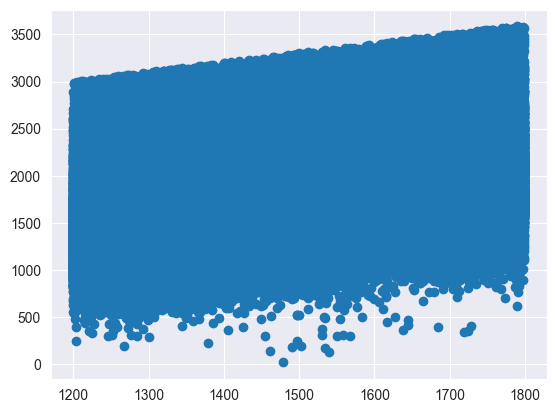

In [62]:
plt.scatter(train_eta, train_p1_geo_y)

In [63]:
import seaborn as sns

<AxesSubplot: ylabel='Count'>

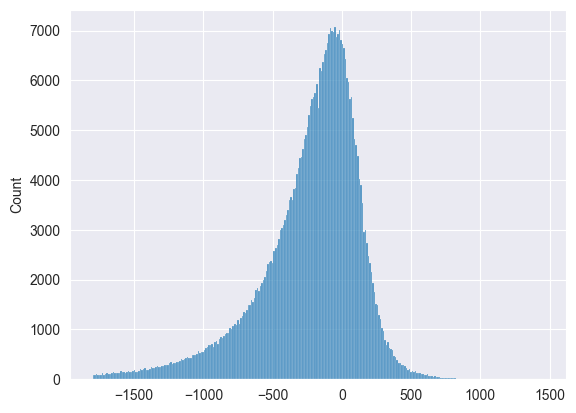

In [64]:
eta_err = train_p1_geo_x['eta'] - train_p1_geo_y
sns.histplot(eta_err)

In [65]:
print(eta_err.mean())
print(eta_err.std())
print(eta_err.kurtosis())
print(eta_err.skew())

-230.52753964955687
364.9229767864145
1.959038628268726
-1.1453677343051023


<AxesSubplot: xlabel='a_t_a_result.ride_a_t_a', ylabel='Count'>

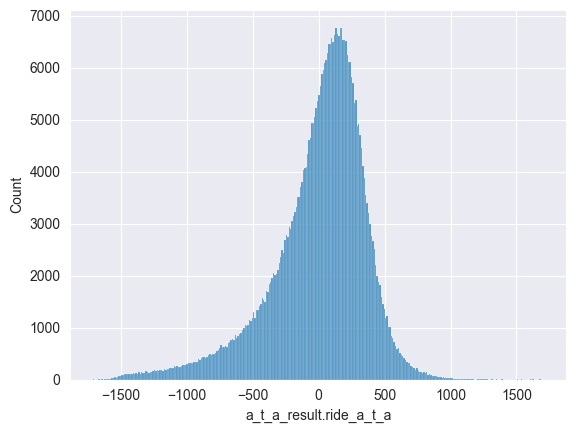

In [66]:
pred_err = train_pred_geo - train_p1_geo_y
sns.histplot(pred_err)

In [67]:
print(pred_err.mean())
print(pred_err.std())
print(pred_err.kurtosis())
print(pred_err.skew())

-7.815383634135306e-13
360.8771940150293
1.8983215137755232
-1.0628900359362234


In [154]:
reg_h3_p1 = LinearRegression().fit(train_p1_h3_x, train_p1_h3_y)

In [155]:
print(reg_h3_p1.coef_)
print(reg_h3_p1.intercept_)

[ 1.26783627e+10  1.26783627e+10  3.36497938e+11  1.26783627e+10
  1.26783627e+10  1.26783627e+10  1.26783627e+10  1.26783627e+10
 -2.61619424e+09 -2.61619425e+09 -3.26435770e+11 -2.61619425e+09
 -2.61619425e+09 -2.61619425e+09 -2.61619424e+09 -2.61619425e+09
  9.86321442e-01 -2.57691789e-02  8.68180725e+00]
-10062168381.208202


In [156]:
train_pred_h3 = reg_h3_p1.predict(train_p1_h3_x)
test_pred_h3 = reg_h3_p1.predict(test_p1_h3_x)

In [157]:
known_h3_index = np.count_nonzero(test_p1_h3_x[:, 0:17], axis=1) == 2

In [158]:
test_p1_h3_y = test_p1_h3_y[known_h3_index]
test_p1_h3_x = test_p1_h3_x[known_h3_index]
test_pred_h3 = test_pred_h3[known_h3_index]

In [45]:
d = {'eta': train_p1_geo_x['eta'], 'seldon': train_pred_geo, 'ata': train_p1_geo_y, 'eta - ata': train_p1_geo_x['eta'] - train_p1_geo_y, 'seldon - ata': train_pred_geo - train_p1_geo_y}
df = pd.DataFrame(data=d)
df[abs(df['eta - ata']) > 2200]

,eta,seldon,ata,eta - ata,seldon - ata
2976,1526,1836.110116,4156,-2630,-2319.889884
3358,1678,2006.297146,3904,-2226,-1897.702854
4773,1331,1572.528030,3843,-2512,-2270.471970
6554,1668,1976.782710,4060,-2392,-2083.217290
8386,1334,1450.304367,3802,-2468,-2351.695633
...,...,...,...,...,...
4042946,1750,2124.569817,4674,-2924,-2549.430183
4044773,1773,2162.366582,4176,-2403,-2013.633418
4049608,1626,1969.847027,4132,-2506,-2162.152973
4051682,1641,2036.224360,5930,-4289,-3893.775640


In [49]:
rides_with_id.loc[38985]

accepted_driver_id                                                          798945
created_at                                                     2022-08-02 07:30:31
passenger_id                                                              15448941
source_lat                                                                35.69907
source_lng                                                               51.396088
destination_lat                                                          35.739376
destination_lng                                                          51.147438
eta                                                                           1679
provider                                                             smapp-same-dc
ata                                                                          10758
ride_id                                                                 4714926571
city                                                                             1
driv

In [111]:
1659450530 - 1659447054.0

3476.0

In [100]:
train_p1_geo_y.loc[5]

602

In [85]:
rides_with_id.loc[1168]

accepted_driver_id                                                          272800
created_at                                                     2022-08-02 14:30:46
passenger_id                                                              23145890
source_lat                                                               35.795856
source_lng                                                               51.451664
destination_lat                                                          35.810123
destination_lng                                                          51.459946
eta                                                                            506
provider                                                             smapp-same-dc
ata                                                                           1261
ride_id                                                                 4717549146
city                                                                             1
driv

In [163]:
print("ETA train MAE", mean_absolute_error(train_p1_geo_y, train_p1_geo_x['eta']))
print("prediction train MAE", mean_absolute_error(train_p1_geo_y, train_pred_geo))

print("ETA test MAE ", mean_absolute_error(test_p1_geo_y, test_p1_geo_x['eta']))
print("prediction test MAE", mean_absolute_error(test_p1_geo_y, test_pred_geo))


print("ETA train MSE", mean_squared_error(train_p1_geo_y, train_p1_geo_x['eta']))
print("prediction train MSE", mean_squared_error(train_p1_geo_y, train_pred_geo))

print("ETA test MSE ", mean_squared_error(test_p1_geo_y, test_p1_geo_x['eta']))
print("prediction test MSE", mean_squared_error(test_p1_geo_y, test_pred_geo))


print("ETA train explained_variance_score", explained_variance_score(train_p1_geo_y, train_p1_geo_x['eta']))
print("prediction train explained_variance_score", explained_variance_score(train_p1_geo_y, train_pred_geo))

print("ETA test explained_variance_score ", explained_variance_score(test_p1_geo_y, test_p1_geo_x['eta']))
print("prediction test explained_variance_score", explained_variance_score(test_p1_geo_y, test_pred_geo))


print("ETA train median_absolute_error", median_absolute_error(train_p1_geo_y, train_p1_geo_x['eta']))
print("prediction train median_absolute_error", median_absolute_error(train_p1_geo_y, train_pred_geo))

print("ETA test median_absolute_error ", median_absolute_error(test_p1_geo_y, test_p1_geo_x['eta']))
print("prediction test median_absolute_error", median_absolute_error(test_p1_geo_y, test_pred_geo))


print("ETA train r2_score", r2_score(train_p1_geo_y, train_p1_geo_x['eta']))
print("prediction train r2_score", r2_score(train_p1_geo_y, train_pred_geo))

print("ETA test r2_score ", r2_score(test_p1_geo_y, test_p1_geo_x['eta']))
print("prediction test r2_score", r2_score(test_p1_geo_y, test_pred_geo))


print("ETA train MAPE", mean_absolute_percentage_error(train_p1_geo_y, train_p1_geo_x['eta']))
print("prediction train MAPE", mean_absolute_percentage_error(train_p1_geo_y, train_pred_geo))

print("ETA test MAPE ", mean_absolute_percentage_error(test_p1_geo_y, test_p1_geo_x['eta']))
print("prediction test MAPE", mean_absolute_percentage_error(test_p1_geo_y, test_pred_geo))

ETA train MAE 1700.089602299952
prediction train MAE 391.8828847826638
ETA test MAE  1694.576439790576
prediction test MAE 380.4741775617792
ETA train MSE 3238072.5486344034
prediction train MSE 341481.57597539
ETA test MSE  3154440.089528796
prediction test MSE 280567.6058180186
ETA train explained_variance_score 0.07859980641326159
prediction train explained_variance_score 0.09525520688694078
ETA test explained_variance_score  0.09515334409077303
prediction test explained_variance_score 0.10264539398016503
ETA train median_absolute_error 1522.0
prediction train median_absolute_error 320.54520771353054
ETA test median_absolute_error  1525.0
prediction test median_absolute_error 320.9049128872866
ETA train r2_score -7.579172301554692
prediction train r2_score 0.09525520688694078
ETA test r2_score  -9.091132059069732
prediction test r2_score 0.10245727246334457
ETA train MAPE 0.7916681339449584
prediction train MAPE 0.17171132174216008
ETA test MAPE  0.7898949720861153
prediction test M

In [46]:
train_p4_geo_x_normalized = (train_p4_geo_x - train_p4_geo_x.min()) / (train_p4_geo_x.max() - train_p4_geo_x.min())
train_p4_geo_y_normalized = (train_p4_geo_y - train_p4_geo_y.min()) / (train_p4_geo_y.max() - train_p4_geo_y.min())
# test_p4_geo_x_normalized = (test_p4_geo_x - train_p4_geo_x.min()) / (train_p4_geo_x.max() - train_p4_geo_x.min())
# test_p4_geo_y_normalized = (test_p4_geo_y - train_p4_geo_y.min()) / (train_p4_geo_y.max() - train_p4_geo_y.min())

reg_p4_geo_normalized = LinearRegression().fit(train_p4_geo_x_normalized, train_p4_geo_y_normalized)
print(reg_p4_geo_normalized.coef_)
print(reg_p4_geo_normalized.intercept_)

[ 0.95267888  0.03992745  0.01639903  0.14161629  0.07104881 -0.00869313
 -0.01985985]
0.027375837176890544


In [39]:
print("ETA train MAE", mean_absolute_error(train_p4_h3_y, train_p4_h3_x[:, 17]))
print("prediction train MAE", mean_absolute_error(train_p4_h3_y, train_pred_h3))

print("ETA test MAE ", mean_absolute_error(test_p4_h3_y, test_p4_h3_x[:, 17]))
print("prediction test MAE", mean_absolute_error(test_p4_h3_y, test_pred_h3))


print("ETA train MSE", mean_squared_error(train_p4_h3_y, train_p4_h3_x[:, 17]))
print("prediction train MSE", mean_squared_error(train_p4_h3_y, train_pred_h3))

print("ETA test MSE ", mean_squared_error(test_p4_h3_y, test_p4_h3_x[:, 17]))
print("prediction test MSE", mean_squared_error(test_p4_h3_y, test_pred_h3))


print("ETA train explained_variance_score", explained_variance_score(train_p4_h3_y, train_p4_h3_x[:, 17]))
print("prediction train explained_variance_score", explained_variance_score(train_p4_h3_y, train_pred_h3))

print("ETA test explained_variance_score ", explained_variance_score(test_p4_h3_y, test_p4_h3_x[:, 17]))
print("prediction test explained_variance_score", explained_variance_score(test_p4_h3_y, test_pred_h3))


print("ETA train median_absolute_error", median_absolute_error(train_p4_h3_y, train_p4_h3_x[:, 17]))
print("prediction train median_absolute_error", median_absolute_error(train_p4_h3_y, train_pred_h3))

print("ETA test median_absolute_error ", median_absolute_error(test_p4_h3_y, test_p4_h3_x[:, 17]))
print("prediction test median_absolute_error", median_absolute_error(test_p4_h3_y, test_pred_h3))


print("ETA train r2_score", r2_score(train_p4_h3_y, train_p4_h3_x[:, 17]))
print("prediction train r2_score", r2_score(train_p4_h3_y, train_pred_h3))

print("ETA test r2_score ", r2_score(test_p4_h3_y, test_p4_h3_x[:, 17]))
print("prediction test r2_score", r2_score(test_p4_h3_y, test_pred_h3))


print("ETA train MAPE", mean_absolute_percentage_error(train_p4_h3_y, train_p4_h3_x[:, 17]))
print("prediction train MAPE", mean_absolute_percentage_error(train_p4_h3_y, train_pred_h3))

print("ETA test MAPE ", mean_absolute_percentage_error(test_p4_h3_y, test_p4_h3_x[:, 17]))
print("prediction test MAPE", mean_absolute_percentage_error(test_p4_h3_y, test_pred_h3))

ETA train MAE 558.6899742605314
prediction train MAE 468.32320172854264
ETA test MAE  609.4802658229795
prediction test MAE 532.3905549659162
ETA train MSE 724259.5492995734
prediction train MSE 474510.4137146755
ETA test MSE  1005379.4640005743
prediction test MSE 706504.3378821977
ETA train explained_variance_score 0.5486781823287357
prediction train explained_variance_score 0.5735345690702949
ETA test explained_variance_score  0.4753275329161858
prediction test explained_variance_score 0.5084530615897137
ETA train median_absolute_error 353.0
prediction train median_absolute_error 347.19482421875
ETA test median_absolute_error  352.0
prediction test median_absolute_error 366.8814697265625
ETA train r2_score 0.3490729563150865
prediction train r2_score 0.5735345690702917
ETA test r2_score  0.2984759208241079
prediction test r2_score 0.5070221515223838
ETA train MAPE 0.16697790395524195
prediction train MAPE 0.1610154609737745
ETA test MAPE  0.1730999583791752
prediction test MAPE 0.17

In [47]:
train_p4_h3_x_normalized = (train_p4_h3_x - train_p4_h3_x.min()) / (train_p4_h3_x.max() - train_p4_h3_x.min())
train_p4_h3_y_normalized = (train_p4_h3_y - train_p4_h3_y.min()) / (train_p4_h3_y.max() - train_p4_h3_y.min())
# test_p4_h3_x_normalized = (test_p4_h3_x - train_p4_h3_x.min()) / (train_p4_h3_x.max() - train_p4_h3_x.min())
# test_p4_h3_y_normalized = (test_p4_h3_y - train_p4_h3_y.min()) / (train_p4_h3_y.max() - train_p4_h3_y.min())

reg_p4_h3_normalized = LinearRegression().fit(train_p4_h3_x_normalized, train_p4_h3_y_normalized)
print(reg_p4_h3_normalized.coef_)
print(reg_p4_h3_normalized.intercept_)

[ 3.38839243e+11  3.38839243e+11  3.38839244e+11  3.38839243e+11
  3.38839243e+11  3.38839243e+11  3.38839243e+11 -1.81469415e+11
 -1.81469415e+11 -1.81469415e+11 -1.81469415e+11 -1.81469415e+11
 -1.81469415e+11 -1.81469415e+11 -1.81469415e+11 -1.81469415e+11
 -1.81469415e+11  1.10072538e+00 -4.58049363e-01 -1.50679642e+02]
-17055362.3876918


In [ ]:
%set_env AWS_ACCESS_KEY_ID=SokXIEc1g9vNqCJt4CSObyk6vumoOOPQ
%set_env AWS_SECRET_ACCESS_KEY=QNyTpGhFjUTYSP9VKmfhpUizwKr0t8gk
%set_env MLFLOW_S3_ENDPOINT_URL=https://minio-clustered-smapp-storage.apps.private.teh-1.snappcloud.io

# create experiment
%set_env MLFLOW_TRACKING_URI=https://mlflow.apps.private.okd4.teh-1.snappcloud.io/
# mlflow experiments create --experiment-name elahe

# run script under experiment
%set_env MLFLOW_EXPERIMENT_NAME=elahe
# cd save/
# python test.py

In [ ]:
! echo $AWS_ACCESS_KEY_ID
! echo $AWS_SECRET_ACCESS_KEY
! echo $MLFLOW_S3_ENDPOINT_URL
! echo $MLFLOW_TRACKING_URI
! echo $MLFLOW_EXPERIMENT_NAME

In [ ]:
# with mlflow.start_run(run_name="regression") as run:
#     # Log the sklearn model and register as version 1
#     mlflow.sklearn.log_model(
#         sk_model=reg_p4,
#         artifact_path="regression",
#         registered_model_name="reg-model"
#     )

In [ ]:
# with mlflow.start_run(run_name="YOUR_RUN_NAME") as run:
#     params = {"n_estimators": 5, "random_state": 42}
#     sk_learn_rfr = RandomForestRegressor(**params)
#
#     # Log parameters and metrics using the MLflow APIs
#     mlflow.log_params(params)
#     mlflow.log_param("param_1", randint(0, 100))
#     mlflow.log_metrics({"metric_1": random(), "metric_2": random() + 1})
#
#     # Log the sklearn model and register as version 1
#     mlflow.sklearn.log_model(
#         sk_model=sk_learn_rfr,
#         artifact_path="sklearn-model",
#         registered_model_name="sk-learn-random-forest-reg-model"
#     )